### Question 11
Given the data of a feature contributing to different classes

https://drive.google.com/file/d/1mCjtYHiX--mMUjicuaP2gH3k-SnFxt8Y/view?usp
=share_

a. Check whether the distribution of all the classes are the same or not.
b. Check for the equality of variance/
c. Which amount LDA and QDA would perform better on this data for
classification and why.
d. Check the equality of mean for between all the classes.

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import levene
from statistics import variance
from scipy.stats import f_oneway

In [19]:
df=pd.read_csv('data.csv',index_col='Patient ID')
df.head()

,Blood Pressure Before (mmHg),Blood Pressure After (mmHg)
Patient ID,,
1,130,120
2,142,135
3,120,118
4,135,127
5,148,140


In [20]:
print(df.columns)

Index([' Blood Pressure Before (mmHg)', ' Blood Pressure After (mmHg)'], dtype='object')


### A] Check whether the distribution of all the classes are the same or not.

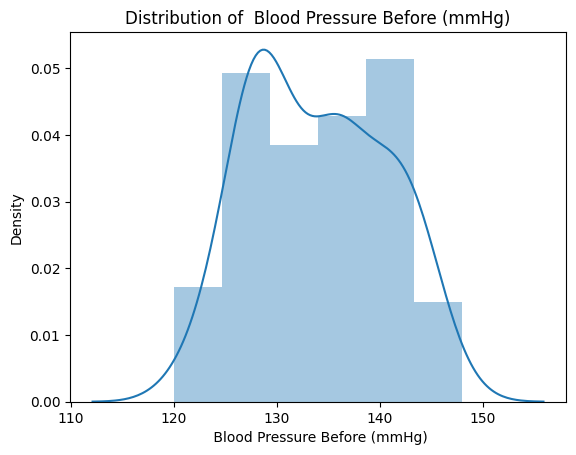

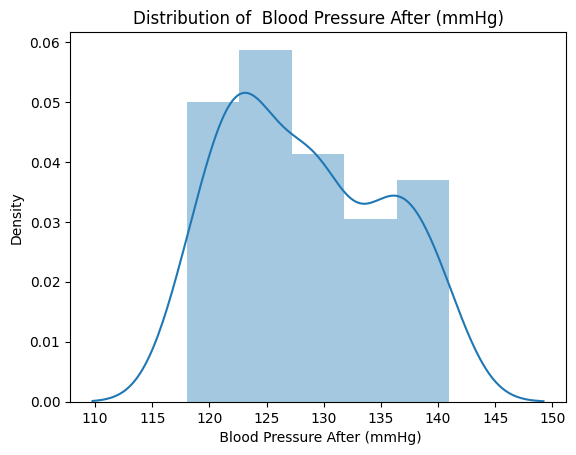

In [21]:
for column in df.columns:
    # Check if the column contains numerical data
    if df[column].dtype in ['int64', 'float64']:
        plt.figure()
        sns.distplot(df[column])
        plt.title(f"Distribution of {column}")
        plt.show()
    else:
        print(f"{column} is not a numerical column and will not be plotted.")

### B] Check for the equality of variance/

In [22]:
var_after = variance(df[' Blood Pressure After (mmHg)'])
var_before = variance(df[' Blood Pressure Before (mmHg)'])
print(f'Variance before {var_before}')
print(f'Variance after {var_after}')

statistic, p_value = levene(df[' Blood Pressure Before (mmHg)'], df[' Blood Pressure After (mmHg)'])
alpha = 0.05
if p_value < alpha:
    print("The variances are significantly different.")
else:
    print("The variances are not significantly different.")


Variance before 43.53727272727273
Variance after 47.444848484848485
The variances are not significantly different.


### D] Check the equality of mean for between all the classes.

In [23]:
f_statistic, p_value = f_oneway(df[' Blood Pressure Before (mmHg)'],df[' Blood Pressure After (mmHg)'])
print(f'f-statistic value {f_statistic}')
print(f'p-value value {p_value}')

f-statistic value 33.85555270599285
p-value value 2.3565868442707578e-08
